# Hüseyin ORÇAN 18701040

In [1]:
import numpy as np 
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt 

In [2]:
giris_kesinti = np.arange(0, 101, 1) 
giris_depo = np.arange(0, 101, 1) 
cikis_basinc = np.arange(0, 101, 1) 

giris_kesinti_az = mf.trimf(giris_kesinti, [0,0,0.5]) 
giris_kesinti_cok = mf.trimf(giris_kesinti,[0,0.5,1]) 
giris_kesinti_cokfazla = mf.trimf(giris_kesinti,[0.5,1,1])
                                  
                                  
                            
giris_depo_az = mf.trimf(giris_kesinti,[0,0,50]) 
giris_depo_normal = mf.trimf(giris_kesinti,[0,50,100])  
giris_depo_cok = mf.trimf(giris_kesinti,[50,100,100])  
                            

cikis_basinc_düsük = mf.trimf(cikis_basinc,[0,0,50]) 
cikis_basinc_normal = mf.trimf(cikis_basinc,[0,50,100]) 
cikis_basinc_yüksek = mf.trimf(cikis_basinc,[50,100,100]) 

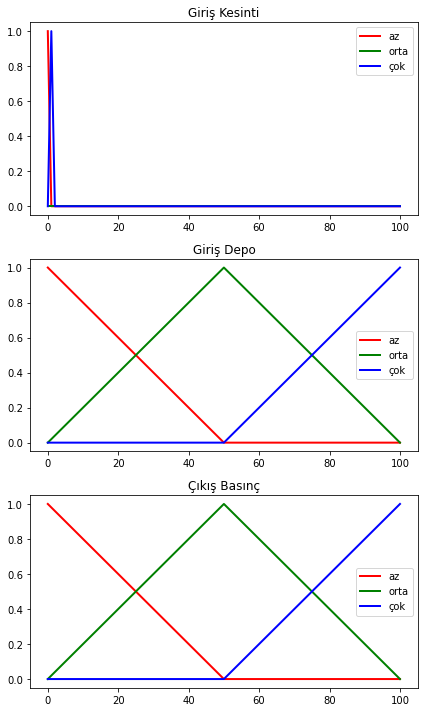

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize =(6, 10))

ax0.plot(giris_kesinti, giris_kesinti_az, 'r', linewidth = 2, label="az")
ax0.plot(giris_kesinti, giris_kesinti_cok, 'g', linewidth = 2, label="orta")
ax0.plot(giris_kesinti, giris_kesinti_cokfazla, 'b', linewidth = 2, label="çok")
ax0.set_title('Giriş Kesinti')
ax0.legend()

ax1.plot(giris_depo, giris_depo_az, 'r', linewidth = 2, label="az")
ax1.plot(giris_depo, giris_depo_normal, 'g', linewidth = 2, label="orta")
ax1.plot(giris_depo, giris_depo_cok, 'b', linewidth = 2, label="çok")
ax1.set_title('Giriş Depo')
ax1.legend()

ax2.plot(cikis_basinc, cikis_basinc_düsük, 'r', linewidth = 2, label="az")
ax2.plot(cikis_basinc, cikis_basinc_normal, 'g', linewidth = 2, label="orta")
ax2.plot(cikis_basinc, cikis_basinc_yüksek, 'b', linewidth = 2, label="çok")
ax2.set_title('Çıkış Basınç')
ax2.legend()
plt.tight_layout()

In [4]:
giris_kesinti_input = 0.5
giris_depo_input = 20 



giris_kesinti_member_az = fuzz.interp_membership(giris_kesinti,giris_kesinti_az,giris_kesinti_input) 
giris_kesinti_member_cok = fuzz.interp_membership(giris_kesinti,giris_kesinti_cok,giris_kesinti_input)
giris_kesinti_member_cokfazla = fuzz.interp_membership(giris_kesinti,giris_kesinti_cokfazla,giris_kesinti_input)

giris_depo_member_az = fuzz.interp_membership(giris_depo,giris_depo_az,giris_depo_input)
giris_depo_member_normal = fuzz.interp_membership(giris_depo,giris_depo_normal,giris_depo_input)
giris_depo_member_cok = fuzz.interp_membership(giris_depo,giris_depo_cok,giris_depo_input)

In [5]:
rule1 = np.fmin(np.fmin(giris_kesinti_member_az, giris_depo_member_cok), cikis_basinc_yüksek) 
rule2 = np.fmin(np.fmin(giris_kesinti_member_cok, giris_depo_member_cok), cikis_basinc_normal) 
rule3 = np.fmin(np.fmin(giris_kesinti_member_az, giris_depo_member_az), cikis_basinc_düsük) 
rule4 = np.fmin(np.fmin(giris_kesinti_member_cok, giris_depo_member_az), cikis_basinc_düsük) 
rule5 = np.fmin(np.fmin(giris_kesinti_member_cokfazla, giris_depo_member_az), cikis_basinc_düsük) 
rule6 = np.fmin(np.fmin(giris_kesinti_member_az, giris_depo_member_normal), cikis_basinc_normal) 

In [6]:


birlesim_yüksek = rule1 
birlesim_normal = np.fmax(rule2, rule6) 
birlesim_düsük  = np.fmax(rule3, rule4,rule5)

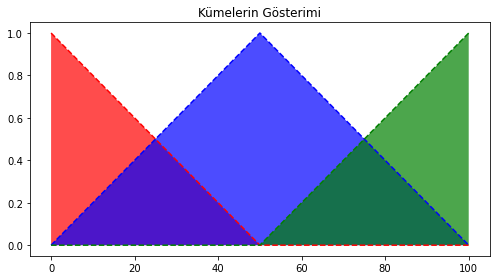

In [7]:
brake0 = np.zeros_like(cikis_basinc)

fig, ax0 = plt.subplots(figsize = (7, 4))
ax0.fill_between(cikis_basinc, brake0, cikis_basinc_düsük, facecolor = 'r', alpha = 0.7)
ax0.plot(cikis_basinc, cikis_basinc_düsük, 'r', linestyle = '--')

ax0.fill_between(cikis_basinc,brake0,cikis_basinc_normal,facecolor = 'b', alpha = 0.7)
ax0.plot(cikis_basinc,cikis_basinc_normal,'b',linestyle = '--')

ax0.fill_between(cikis_basinc, brake0, cikis_basinc_yüksek, facecolor = 'g', alpha = 0.7)
ax0.plot(cikis_basinc, cikis_basinc_yüksek, 'g', linestyle = '--')
ax0.set_title('Kümelerin Gösterimi')

plt.tight_layout()

In [8]:
# Durulaştırma
birlesim_basinc_sonuc = np.fmax(birlesim_düsük,birlesim_normal,birlesim_yüksek)

defuzzified  = fuzz.defuzz(cikis_basinc, birlesim_basinc_sonuc, 'centroid')

result = fuzz.interp_membership(cikis_basinc, birlesim_basinc_sonuc, defuzzified)
# Mantık Sonucu
print("Çıkış Değeri",defuzzified)

Çıkış Değeri 42.95698924731189
